In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as st
import seaborn as s

# Задание 1
Для Z данных построить вариационный ряд, полигон относительных частот.   
Для R данных построить данных таблицу групп и гистограмму. 
# Задание 2
Построить для целочисленных(Z) и вещественных (R) данных эмпирическую функцию распределения F*(y).
# Задание 3
Для целых и вещественных данных расписать описательные статистики:  
*   выборочное среднее
*   выборочную дисперсию 
*   сренеквадратическое отклонение 
*   выборочную вариацию 





№1 для целочисленных данных

In [ ]:
df = pd.read_csv('new.csv')
df = df.drop(['Случайное число [0-8]', 'Группа', '№'], axis=1)
df['Рост']=df['Рост'].str.replace(',','.')

In [ ]:
vr = pd.DataFrame()
vr['з'] = range(1, 14) 
vr['n'] = df['Месяц рождения'].value_counts().sort_index(ascending=True)
vr['p'] = df['Месяц рождения'].value_counts(normalize=True)
vr = vr.drop([0])
vr['з'] = range(1, 13)
vr

,з,n,p
1,1,3.0,0.09375
2,2,5.0,0.15625
3,3,1.0,0.03125
4,4,4.0,0.12500
5,5,1.0,0.03125
6,6,6.0,0.18750
7,7,5.0,0.15625
8,8,1.0,0.03125
9,9,1.0,0.03125
10,10,3.0,0.09375


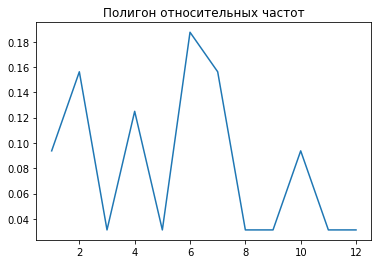

In [ ]:
plt.title("Полигон относительных частот")
plt.plot(vr['з'], vr['p'])

№1 для вещественных данных

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/

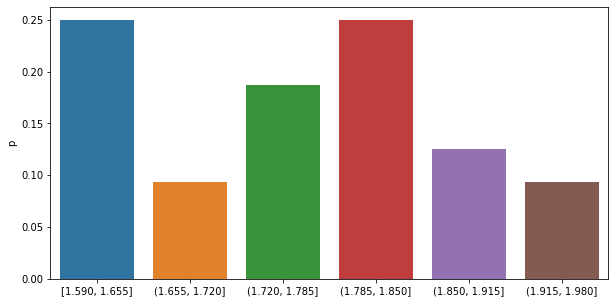

In [ ]:
hist = pd.DataFrame()
n = 1 + math.floor(math.log2(len(df['Рост'])))
h = round((float(df['Рост'].max()) - float(df['Рост'].min()))/n, 3)
m = list()
for i in range(0,n+1): 
  a = float(float(df['Рост'].min()) + h*i)
  m.append(a)
hist['з_start'] = m
m.remove(m[0])
m.append(0)
hist['з_end'] = m 
hist = hist.drop(6)
hist['n'] = 0
for i in df['Рост']:
  for j in range(6):
    if j == 5:
      if float(i) >= float(hist['з_start'][j]) and float(i) <= float(hist['з_end'][j]):
        hist['n'][j] += 1
    else: 
      if float(i) >= float(hist['з_start'][j]) and float(i) < float(hist['з_end'][j]):
        hist['n'][j] += 1
m = list()
for i in range(6): 
  a = hist['n'][i]/32
  m.append(a)
hist['p'] = m
df = df.astype({'Рост': np.float})
l = ['[1.590, 1.655]', '(1.655, 1.720]', '(1.720, 1.785]', '(1.785, 1.850]', '(1.850, 1.915]', '(1.915, 1.980]']
plt.figure(figsize=(10, 5))
s.barplot(l, hist['p'])
plt.show()

(array([8., 3., 6., 8., 4., 3.]),
 array([1.59 , 1.655, 1.72 , 1.785, 1.85 , 1.915, 1.98 ]),
 <a list of 6 Patch objects>)

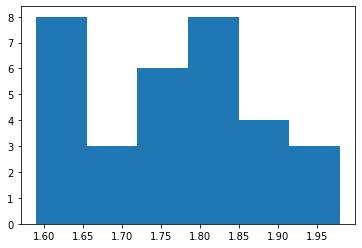

In [ ]:
n, bins, patches = plt.hist(df, density=True, facecolor='g')
plt.xlim(1.59, 1.98)
plt.ylim(0, 0.25)
plt.grid(True)

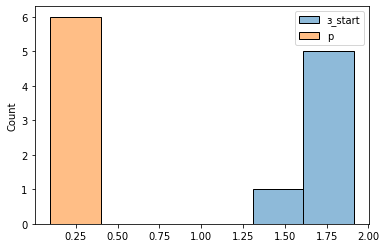

In [ ]:
s.histplot([hist['з_start'], hist['p']], bins=6)

In [ ]:
hist

,з_start,з_end,n,p
0,1.590,1.655,8,0.25000
1,1.655,1.720,3,0.09375
2,1.720,1.785,6,0.18750
3,1.785,1.850,8,0.25000
4,1.850,1.915,4,0.12500
5,1.915,1.980,3,0.09375


№2 для целочесленных

In [ ]:
func_for_R = [0]
sum = 0
for i in vr['p']:
  sum += i
  func_for_R.append(sum)
func_for_R

[0,
 0.09375,
 0.25,
 0.28125,
 0.40625,
 0.4375,
 0.625,
 0.78125,
 0.8125,
 0.84375,
 0.9375,
 0.96875,
 1.0]

№2 для вещественных

In [ ]:
func_for_Z = [0]
sum = 0
for i in hist['p']:
  sum += i
  func_for_Z.append(sum)
func_for_Z, func_for_R

([0, 0.25, 0.34375, 0.53125, 0.78125, 0.90625, 1.0],
 [0,
  0.09375,
  0.25,
  0.28125,
  0.40625,
  0.4375,
  0.625,
  0.78125,
  0.8125,
  0.84375,
  0.9375,
  0.96875,
  1.0])

№ 3

In [ ]:
X_R = st.mean(df['Месяц рождения'])
D_R = st.variance(df['Месяц рождения'])
Q_R = math.sqrt(D_R)
V_R = Q_R/X_R
X_R, D_R, Q_R, V_R

(5.5625, 9.737903225806452, 3.1205613638905505, 0.5609997957556045)

In [ ]:
df = df.astype({'Рост': np.float64})
X_Z = st.mean(df['Рост'])
D_Z = st.variance(df['Рост'])
Q_Z = math.sqrt(D_Z)
V_Z = Q_Z/X_Z
X_Z, D_Z, Q_Z, V_Z

(1.7628125, 0.011717641129032258, 0.10824805369627788, 0.061406447762469285)